In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline

    Date  High   Low   Avg  HDD  CDD  Rainfall
0    1.0  67.0  51.0  59.0    6    0      0.41
1    2.0  54.0  36.0  45.0   20    0      0.00
2    3.0  56.0  33.0  44.5   21    0      0.00
3    4.0  70.0  52.0  61.0    4    0      0.00
4    5.0  61.0  49.0  55.0   10    0      0.00
5    6.0  73.0  53.0  63.0    2    0      0.10
6    7.0  60.0  47.0  53.5   12    0      0.00
7    8.0  48.0  39.0  43.5   22    0      0.00
8    9.0  53.0  32.0  42.5   23    0      0.00
9   10.0  61.0  32.0  46.5   19    0      0.00
10  11.0  76.0  44.0  60.0    5    0      0.00
11  12.0  84.0  62.0  73.0    0    8      0.00
12  13.0  90.0  61.0  75.5    0   11      0.00
13  14.0  87.0  62.0  74.5    0   10      0.00
14  15.0  70.0  57.0  63.5    2    0      0.00
15  16.0  65.0  54.0  59.5    6    0      0.00
16  17.0  71.0  54.0  62.5    3    0      0.00
17  18.0  66.0  46.0  56.0    9    0      0.00
18  19.0  67.0  39.0  53.0   12    0      0.00
19  20.0  58.0  46.0  52.0   13    0      0.00
20  21.0  59.

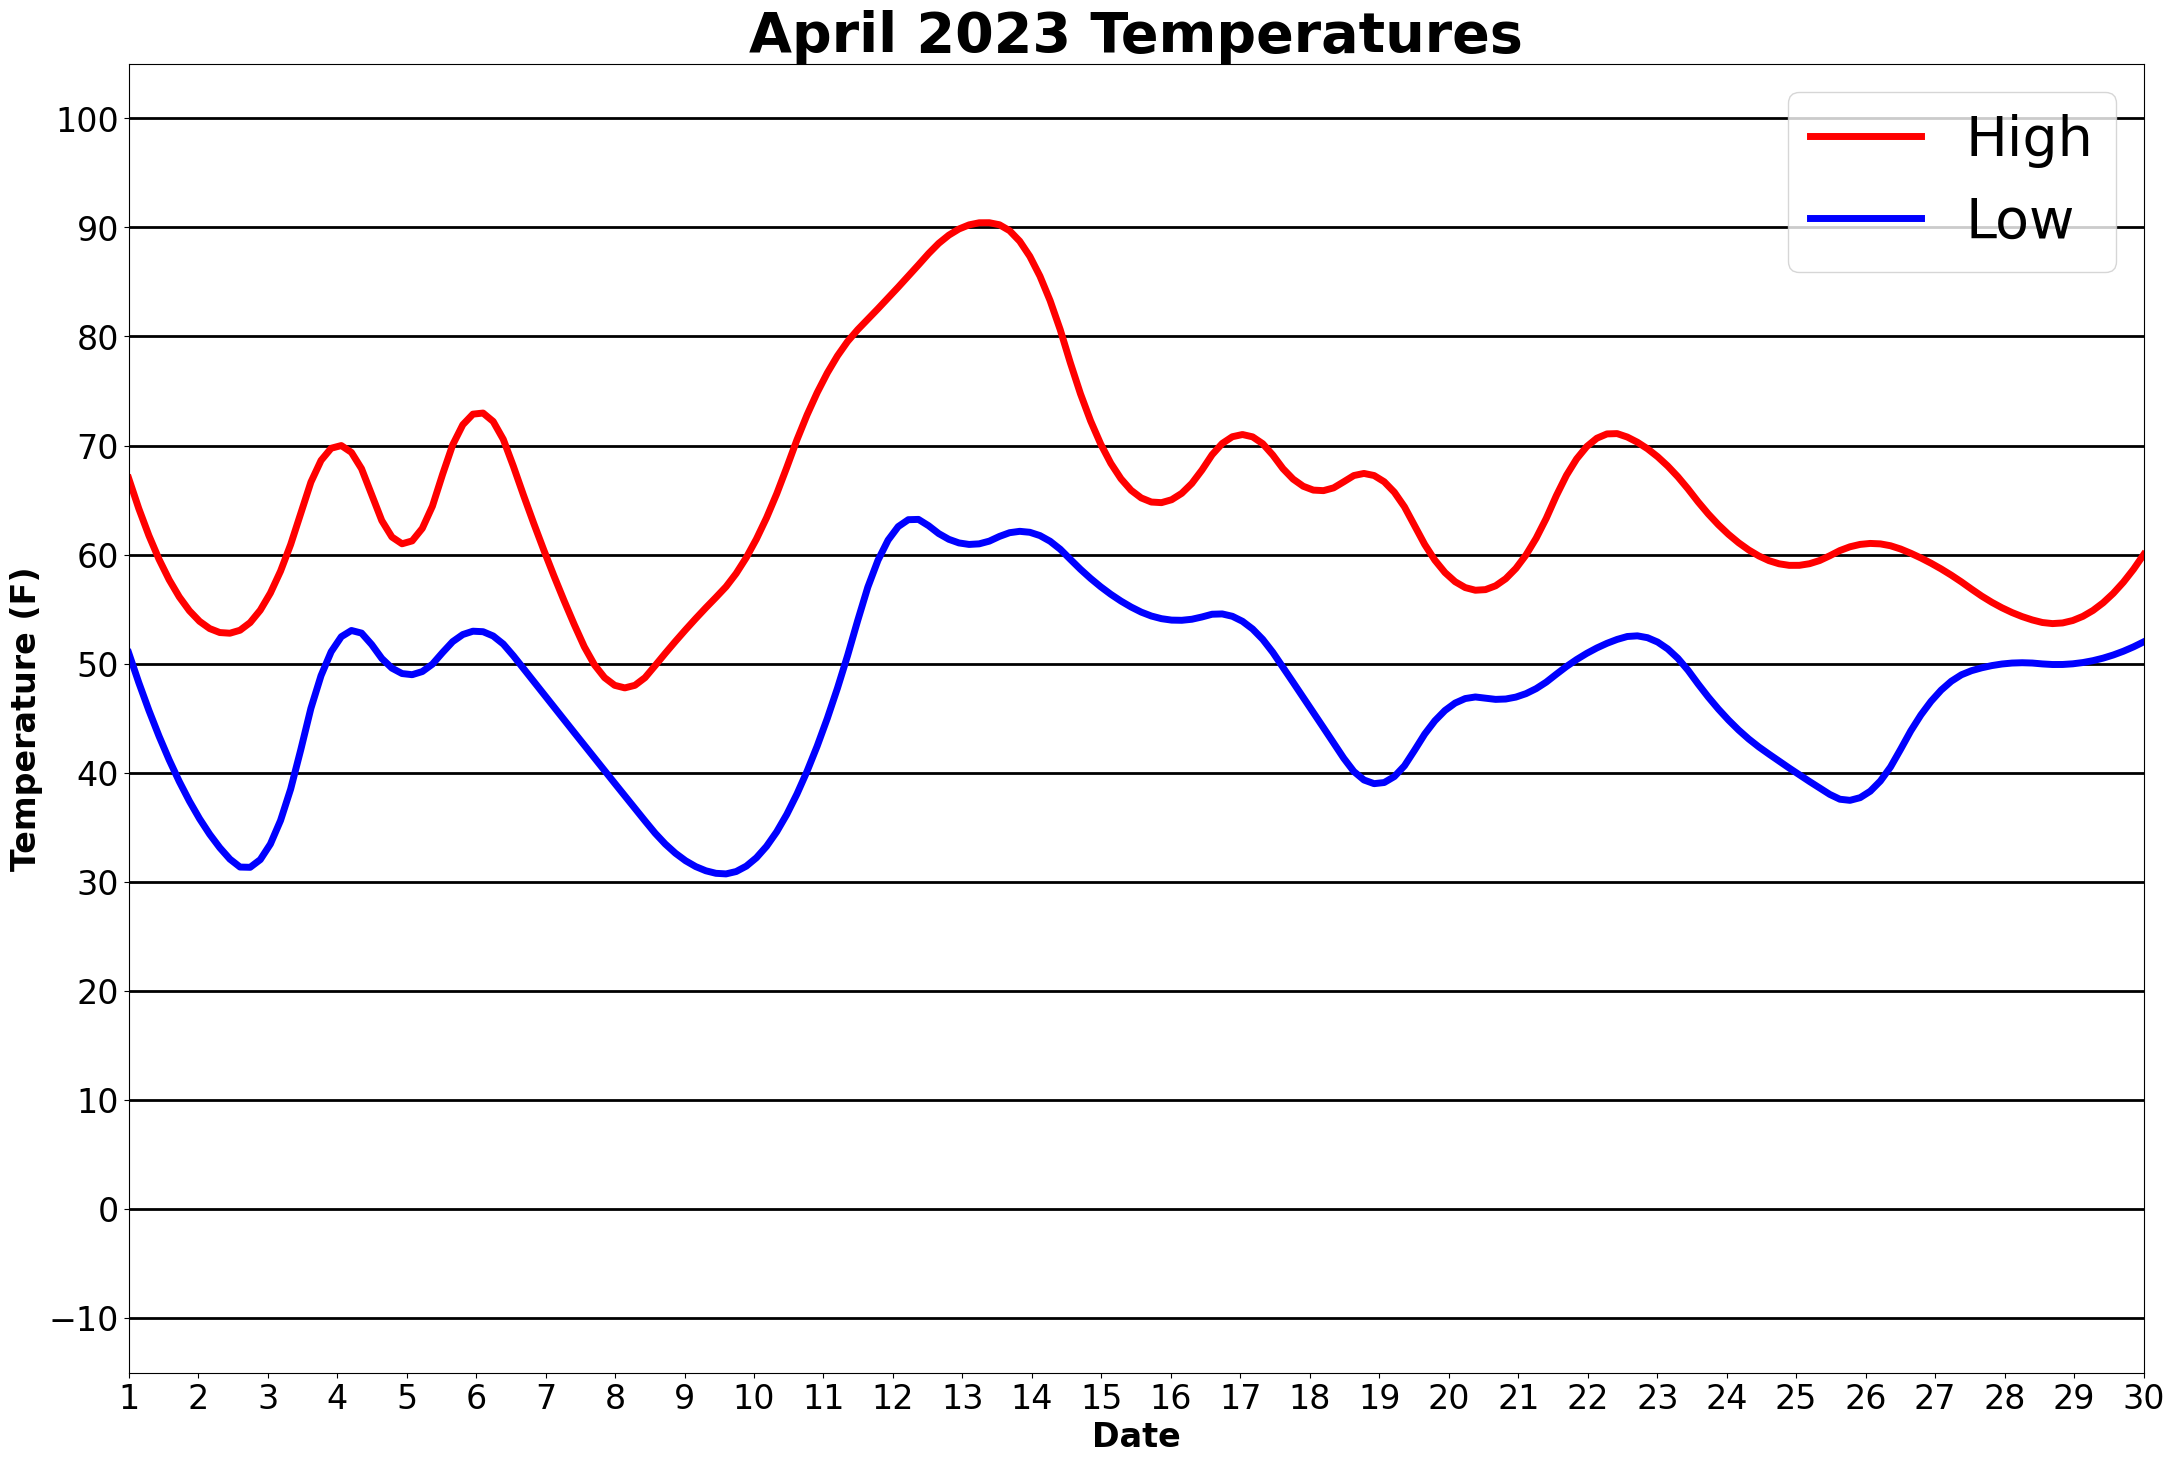

In [2]:
#
# Make some graphs - temperature line plots first
# For just one month
#

month_name = 'April'
addyear = '2023'
r = 30

path = '/Volumes/Elements/code/readexcel/'
wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
getWXdata = getWXdata.drop((r), axis=0)   
print(getWXdata)
   
HI = getWXdata['High']
LO = getWXdata["Low"]
DATE = getWXdata["Date"]
   
y = HI.to_numpy()
y1 = LO.to_numpy()
x = DATE.to_numpy()
print(x)

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 200) 

#define spline
HIspl = make_interp_spline(x, y, k=2)
y_smooth = HIspl(xnew)
LOspl = make_interp_spline(x, y1, k=2)
y1_smooth = LOspl(xnew)

#Plot the results in matplotlib

plt.figure(figsize= (26, 17))
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.ylim(-15, 105)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Temperature (F)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {addyear} Temperatures', fontsize=40, fontweight ='bold')
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.plot(xnew,y_smooth,color = "red", linewidth =5, label ="High")
plt.plot(xnew,y1_smooth,color = "blue", linewidth =5, label ="Low")
plt.legend(fontsize=40)
plt.savefig(f'{path}{month_name}temps_{addyear}')


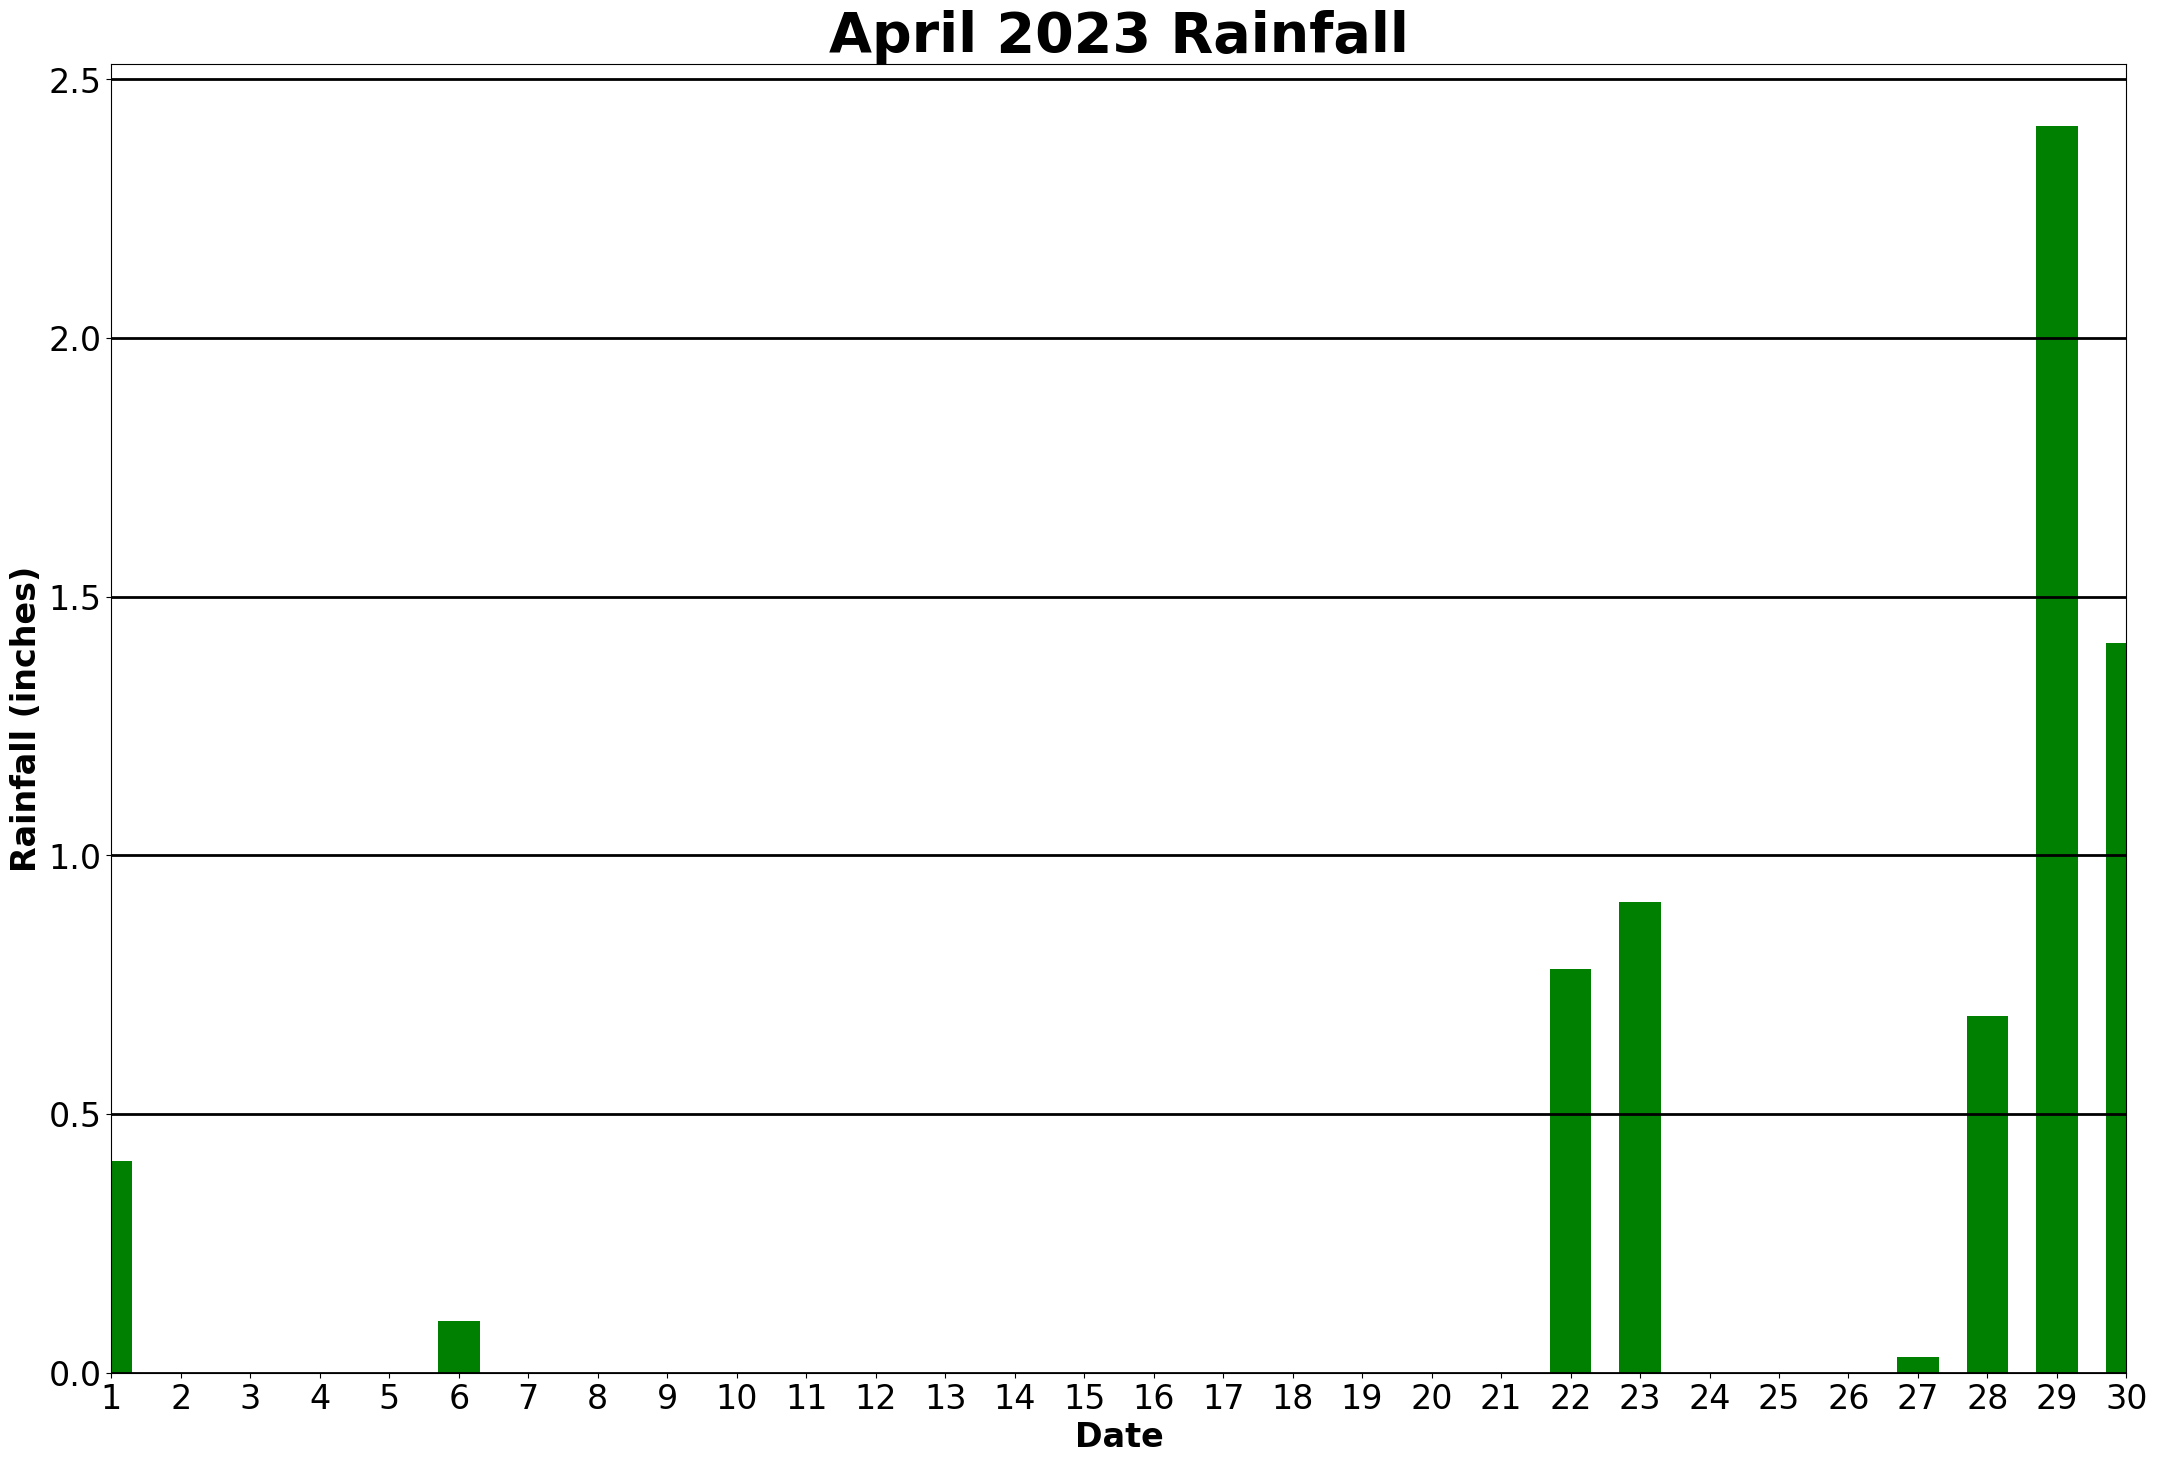

In [3]:
#
# make some graphs - now some rainfall bar plot
# For just one month
#

month_name = 'April'
addyear = '2023'
r = 30


    #Set up data
path = '/Volumes/Elements/code/readexcel/'
wxdata = f'{path}{month_name}_{addyear}.xlsx'
getWXdata = pd.read_excel(wxdata)
getWXdata = getWXdata.drop((r), axis=0)      
    
#Plot the results in matplotlib
plt.figure(figsize=(26, 17))
plt.grid(axis = "y", linewidth = 2.0, color = 'black')
plt.locator_params(axis='x', nbins= r)
plt.xlim(1, r)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Rainfall (inches)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=10)
plt.title(f'{month_name} {addyear} Rainfall', fontsize=40, fontweight ='bold')
plt.bar(getWXdata["Date"],getWXdata["Rainfall"], color = "green", width= 0.6)
plt.savefig(f'{path}{month_name}rainfall_{addyear}') 